<a href="https://colab.research.google.com/github/uluumy/Fondements-de-l-apprentissage-profond/blob/master/Solution_Projet_ChatsChiens_Partie2_AugmentationDeDonnee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet: Chats vs Chiens
## Classification d'images: avec augmentation de donnees

##Étape 1: Mise en place de l'environnement


### Colab

Execution -> Reinitialiser tous les environnemetns d'execussion (lRuntime -> Reset all runtimes)

Execussion -> Modifier le type d'execussion -> Accelereateur materiel -> GPU


### Librairies à importer

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)

from __future__ import absolute_import, division, print_function, unicode_literals

import os  ## Pour lire les fichiers et la structure des répertoires
import matplotlib.pyplot as plt
import numpy as np

### Fonctions utiles

In [0]:
def plot_history(x,y1,y2,y1_label, y2_label, x_label, y_label,title):
  plt.clf()
  plt.plot(x, y1, label=y1_label) 
  plt.plot(x, y2, label=y2_label)
  
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show

In [0]:
# CEtte fonction affiche l'image.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## Étape 2: Obtention des données

### Importer

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

###Comprendre les données

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### Mise en place des paramétres du modéle

In [0]:
BATCH_SIZE = 256  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

## Étape 3: Augmentation des donnees

In [0]:
def ImageAgmentation(datagen,imageIndex):
  from keras.preprocessing import image

  fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

  # We pick one image to "augment"
  img_path = fnames[imageIndex]

  # Read the image and resize it
  img = image.load_img(img_path, target_size=(150, 150))

  # Convert it to a Numpy array with shape (150, 150, 3)
  x = image.img_to_array(img)

  # Reshape it to (1, 150, 150, 3)
  x = x.reshape((1,) + x.shape)

  # The .flow() command below generates batches of randomly transformed images.
  # It will loop indefinitely, so we need to `break` the loop at some point!
  i = 0
  for batch in datagen.flow(x, batch_size=1):
      plt.figure(i)
      imgplot = plt.imshow(image.array_to_img(batch[0]))
      i += 1
      if i % 2 == 0:
          break
 
  plt.show()


### Retourner l'image horizontalement

In [0]:
datagen = ImageDataGenerator(
      horizontal_flip=True
    )

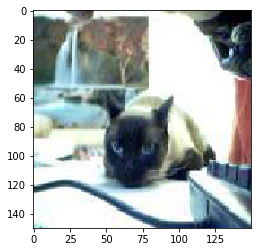

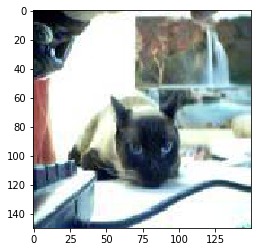

In [0]:
ImageAgmentation(datagen,3)

### Rotation de l'image

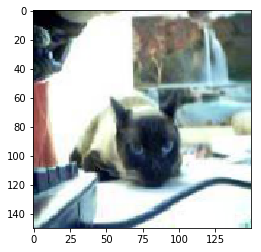

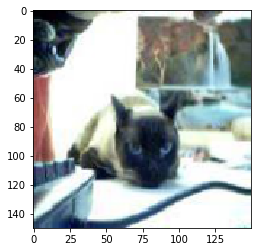

In [0]:
datagen = ImageDataGenerator(
      rotation_range=20
     )

ImageAgmentation(datagen,3)

### Application de zoom 

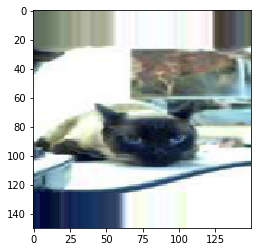

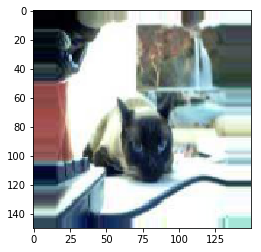

In [0]:
datagen = ImageDataGenerator(
      zoom_range=0.5,
     )
ImageAgmentation(datagen,3)

### Appliquer plusieurs transforamtions

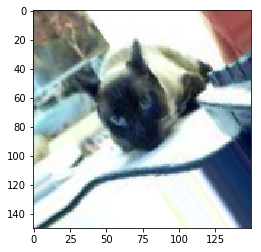

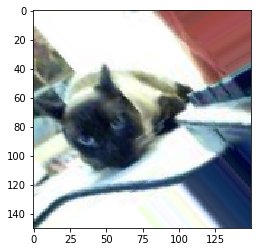

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

ImageAgmentation(datagen,3)

### Generation des des donnees d'entrainement avec augmentation des donnees

In [0]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


### Donnees de validation (sans augmentation des donnees)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Étape 4: Création du modèle

### Définir le modèle

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

### Compiler le modèle

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Sommaire du modèle

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Entrainer le modèle

In [0]:
epochs=50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

### Visualisation des résultats

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']

epochs_range = range(epochs)
val_loss = history.history['val_loss']
plot_history(epochs_range, acc, val_acc, 'Training accuracy', 'Validation accuracy', 'Epochs', 'Accuracy','Training and validation Accuracy')

In [0]:
print('train accuracy:', acc[49])
print('validation accuracy:', val_acc[49])

ressources
https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb#scrollTo=rtPGh2MAVrVa

https://github.com/uluumy/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

Data Augmentation
https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c02_dogs_vs_cats_with_augmentation.ipynb#scrollTo=GBYLOFgOXPJ9

Transfert Learning
https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c01_tensorflow_hub_and_transfer_learning.ipynb

